Importing the important libraries:-

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from warnings import filterwarnings
filterwarnings(action='ignore')

In [236]:
shoe=pd.read_csv('shoebrand.csv')

In [237]:
shoe

,index,name,price,color,category,index.1,size,sc,index.2,durability,review,rating
0,0,-,-,-,-,0,-,-,0.0,-,NaN,NaN
1,1,Flair 2 Unisex Running Shoes,"₹2,349",Asphalt-Puma White,Men'S Sports Footwear,1,UK 6,Style: 377280_03,1.0,PRODUCT STORY\nGet ready to conquer your runs ...,NaN,NaN
2,2,Redon Move Unisex Sneakers,"₹2,359",black-white-high risk red,Men'S Casual Footwear,2,UK 6,Style: 185999_02,2.0,PRODUCT STORY:\nThe low-profile PUMA Redon Mov...,NaN,NaN
3,3,Trigger Unisex Shoes,"₹2,109",Puma Black-Ultra Gray,-,3,UK 9,Style: 194866_01,3.0,PRODUCT STORY\nThe Trigger unisex running shoe...,NaN,NaN
4,4,Trigger Unisex Shoes,"₹2,249",Ultra Gray-Puma White-Puma Black,-,4,UK 6,Style: 194866_03,4.0,PRODUCT STORY\nThe Trigger unisex running shoe...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
104,7,Navy Slip-On Shoe For Men,₹1 606,NAVY,NaN,7,39\nSold out\n40\n41\n4 Left\n42\n43\nSold out...,NaN,NaN,NaN,NaN,NaN
105,8,Navy Slip-On Shoes,₹1 797,NAVY,NaN,8,39\nSold out\n40\nSold out\n41\nSold out\n42\n...,NaN,NaN,NaN,NaN,NaN
106,9,Navy Casual Sneaker For Men,₹3 497,NAVY,NaN,9,39\nSold out\n40\nSold out\n41\nSold out\n42\n...,NaN,NaN,NaN,NaN,NaN
107,10,Dgrey Slip-On Shoe For Men,₹2 096,DGREY,NaN,10,39\nSold out\n40\n3 Left\n41\n42\n43\nSold out...,NaN,NaN,NaN,NaN,NaN


In [238]:
shoe.head()

,index,name,price,color,category,index.1,size,sc,index.2,durability,review,rating
0,0,-,-,-,-,0,-,-,0.0,-,NaN,NaN
1,1,Flair 2 Unisex Running Shoes,"₹2,349",Asphalt-Puma White,Men'S Sports Footwear,1,UK 6,Style: 377280_03,1.0,PRODUCT STORY\nGet ready to conquer your runs ...,NaN,NaN
2,2,Redon Move Unisex Sneakers,"₹2,359",black-white-high risk red,Men'S Casual Footwear,2,UK 6,Style: 185999_02,2.0,PRODUCT STORY:\nThe low-profile PUMA Redon Mov...,NaN,NaN
3,3,Trigger Unisex Shoes,"₹2,109",Puma Black-Ultra Gray,-,3,UK 9,Style: 194866_01,3.0,PRODUCT STORY\nThe Trigger unisex running shoe...,NaN,NaN
4,4,Trigger Unisex Shoes,"₹2,249",Ultra Gray-Puma White-Puma Black,-,4,UK 6,Style: 194866_03,4.0,PRODUCT STORY\nThe Trigger unisex running shoe...,NaN,NaN


In [239]:
shoe.tail()

,index,name,price,color,category,index.1,size,sc,index.2,durability,review,rating
104,7,Navy Slip-On Shoe For Men,₹1 606,NAVY,NaN,7,39\nSold out\n40\n41\n4 Left\n42\n43\nSold out...,NaN,NaN,NaN,NaN,NaN
105,8,Navy Slip-On Shoes,₹1 797,NAVY,NaN,8,39\nSold out\n40\nSold out\n41\nSold out\n42\n...,NaN,NaN,NaN,NaN,NaN
106,9,Navy Casual Sneaker For Men,₹3 497,NAVY,NaN,9,39\nSold out\n40\nSold out\n41\nSold out\n42\n...,NaN,NaN,NaN,NaN,NaN
107,10,Dgrey Slip-On Shoe For Men,₹2 096,DGREY,NaN,10,39\nSold out\n40\n3 Left\n41\n42\n43\nSold out...,NaN,NaN,NaN,NaN,NaN
108,11,Blue/Grey Sneaker For Men,₹1 677,BLUE/GREY,NaN,11,39\nSold out\n40\nSold out\n41\nSold out\n42\n...,NaN,NaN,NaN,NaN,NaN


In [240]:
shoe.dtypes

index           int64
name           object
price          object
color          object
category       object
index.1         int64
size           object
sc             object
index.2       float64
durability     object
review         object
rating         object
dtype: object

## finding null values

In [241]:
shoe.isna().sum()

index          0
name           0
price          0
color          0
category      12
index.1        0
size          48
sc            13
index.2       12
durability    14
review        37
rating        51
dtype: int64

In [242]:
shoe['name'].value_counts()

Ultimashow Shoes                                4
NMD_R1 Shoes                                    3
Ultraboost 1.0 Shoes                            3
Flair 2 Unisex Running Shoes                    3
Superstar Shoes                                 2
                                               ..
Asweetrain Shoes                                1
SOLARGLIDE 6 Shoes                              1
FLODEAN SHOES                                   1
Lite Racer Adapt 4.0 Cloudfoam Slip-On Shoes    1
Blue/Grey Sneaker For Men                       1
Name: name, Length: 89, dtype: int64

In [244]:
shoe.drop(['index','index.1','index.2'],axis=1,inplace=True)

In [245]:
from sklearn import preprocessing
a=preprocessing.LabelEncoder()

In [246]:

shoe['price']=a.fit_transform(shoe['price'])
shoe['color']=a.fit_transform(shoe['color'])

shoe['category']=a.fit_transform(shoe['category'])
shoe['sc']=a.fit_transform(shoe['sc'])

shoe['size']=a.fit_transform(shoe['size'])
shoe['durability']=a.fit_transform(shoe['durability'])

shoe['review']=a.fit_transform(shoe['review'])
shoe['rating']=a.fit_transform(shoe['rating'])

shoe['name']=a.fit_transform(shoe['name'])


## Filling Null Values

In [247]:
shoe['name'].fillna(shoe['name'].median(),inplace=True)
shoe['price'].fillna(shoe['price'].median(),inplace=True)

shoe['category'].fillna(shoe['category'].median(),inplace=True)
shoe['color'].fillna(shoe['color'].median(),inplace=True)

shoe['sc'].fillna(shoe['sc'].median(),inplace=True)

shoe['size'].fillna(shoe['size'].median(),inplace=True)

shoe['review'].fillna(shoe['review'].median(),inplace=True)

shoe['rating'].fillna(shoe['rating'].median(),inplace=True)

shoe['durability'].fillna(shoe['durability'].median(),inplace=True)

In [248]:
shoe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   name        109 non-null    int32
 1   price       109 non-null    int32
 2   color       109 non-null    int32
 3   category    109 non-null    int32
 4   size        109 non-null    int32
 5   sc          109 non-null    int32
 6   durability  109 non-null    int32
 7   review      109 non-null    int32
 8   rating      109 non-null    int32
dtypes: int32(9)
memory usage: 4.0 KB


In [249]:
shoe.keys()

Index(['name', 'price', 'color', 'category', 'size', 'sc', 'durability',
       'review', 'rating'],
      dtype='object')

# statistical summary:-

In [250]:
#correlation
shoe.corr()

,name,price,color,category,size,sc,durability,review,rating
name,1.000000,-0.014322,0.038220,-0.162339,0.283176,-0.237022,-0.164480,-0.023864,-0.138740
price,-0.014322,1.000000,0.448585,-0.145057,0.382772,-0.429635,-0.259215,0.250452,0.171124
color,0.038220,0.448585,1.000000,-0.186379,0.196006,-0.254916,-0.032535,0.457947,0.302865
category,-0.162339,-0.145057,-0.186379,1.000000,-0.477063,0.506932,0.326622,-0.082924,0.083654
size,0.283176,0.382772,0.196006,-0.477063,1.000000,-0.814242,-0.700257,-0.160352,-0.187256
sc,-0.237022,-0.429635,-0.254916,0.506932,-0.814242,1.000000,0.793479,-0.040834,0.074513
durability,-0.164480,-0.259215,-0.032535,0.326622,-0.700257,0.793479,1.000000,0.138596,0.205445
review,-0.023864,0.250452,0.457947,-0.082924,-0.160352,-0.040834,0.138596,1.000000,0.592418
rating,-0.138740,0.171124,0.302865,0.083654,-0.187256,0.074513,0.205445,0.592418,1.000000


In [251]:
shoe.describe()

,name,price,color,category,size,sc,durability,review,rating
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,45.706422,34.770642,47.596330,14.844037,14.990826,16.633028,14.788991,32.073394,8.311927
std,26.544269,19.930729,26.495674,9.050449,5.037811,19.022725,16.630557,18.441452,3.648179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,19.000000,26.000000,9.000000,13.000000,0.000000,0.000000,15.000000,7.000000
50%,46.000000,36.000000,48.000000,13.000000,16.000000,7.000000,7.000000,38.000000,10.000000
75%,70.000000,52.000000,71.000000,24.000000,19.000000,34.000000,29.000000,50.000000,11.000000
max,88.000000,65.000000,93.000000,28.000000,19.000000,49.000000,43.000000,50.000000,11.000000


# Data Transformation:-

In [252]:
x=shoe.drop(columns=['price'],axis=1)
print(x)

     name  color  category  size  sc  durability  review  rating
0       0      0         0     0   0           0      50      11
1      16      1        11    16  22          20      50      11
2      60     93        10    16   1          27      50      11
3      77     86         0    18   5          26      50      11
4      77     91         0    16   6          26      50      11
..    ...    ...       ...   ...  ..         ...     ...     ...
104    33     73        28     3  49          43      50      11
105    34     73        28     7  49          43      50      11
106    32     73        28     7  49          43      50      11
107    10     63        28     2  49          43      50      11
108     7      4        28     7  49          43      50      11

[109 rows x 8 columns]


In [253]:
y=shoe['price']
print(y)

0       0
1      40
2      41
3      36
4      39
       ..
104    19
105    21
106    47
107    31
108    20
Name: price, Length: 109, dtype: int32


# Data Visualization:-

## Correlation heat map

<Figure size 2000x600 with 0 Axes>

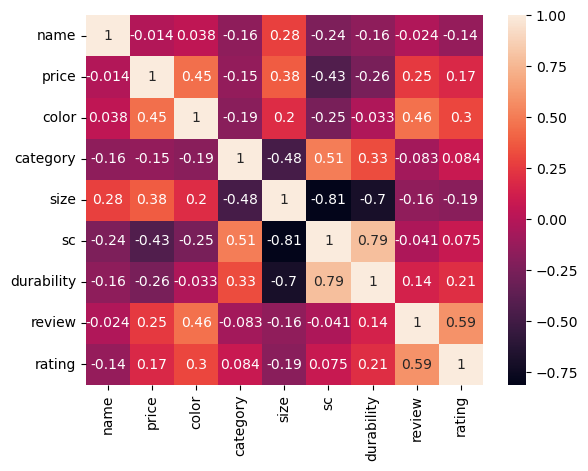

<Figure size 2000x600 with 0 Axes>

In [254]:
#the correlation matrix
corr_matrix = shoe.corr()
plt.figure(figsize=(20, 6))
sns.heatmap(data=corr_matrix, annot=True)

# Univariate Analysis:-

# count plot

<function matplotlib.pyplot.show(close=None, block=None)>

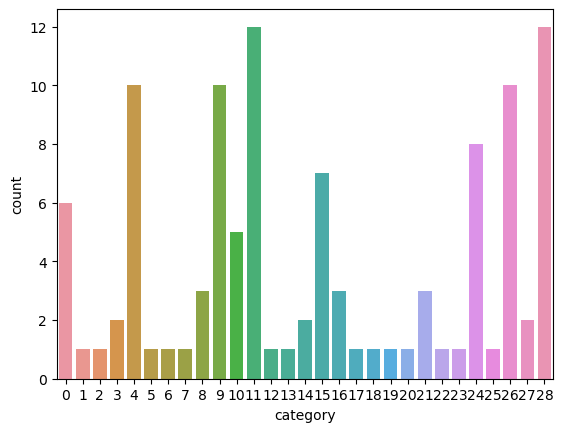

In [255]:
sns.countplot(x ='category', data = shoe)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

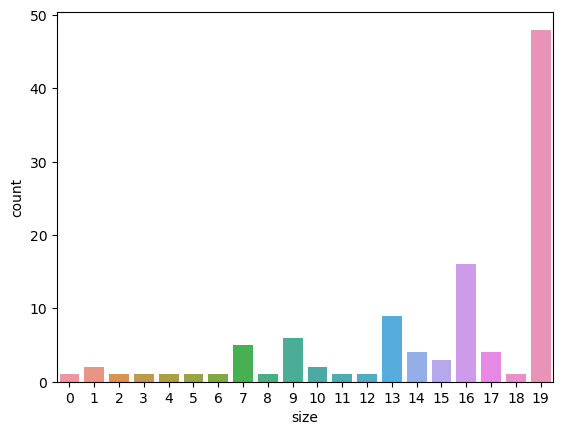

In [256]:
sns.countplot(x ='size', data = shoe)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

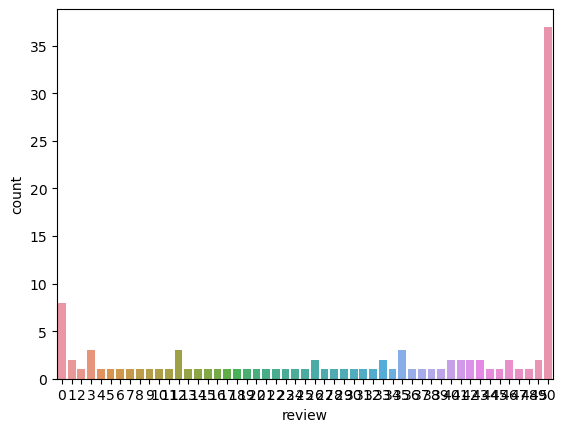

In [257]:
sns.countplot(x ='review', data = shoe)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

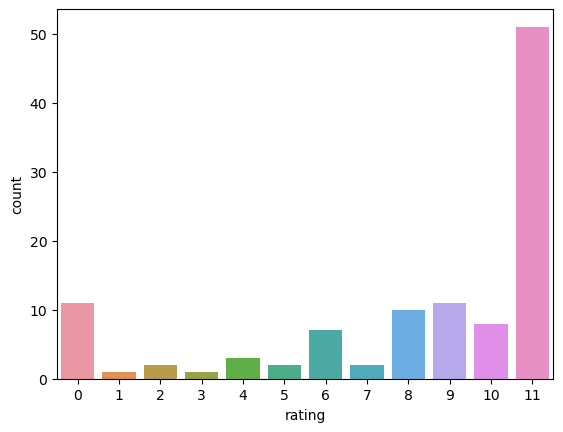

In [258]:
sns.countplot(x ='rating', data = shoe)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

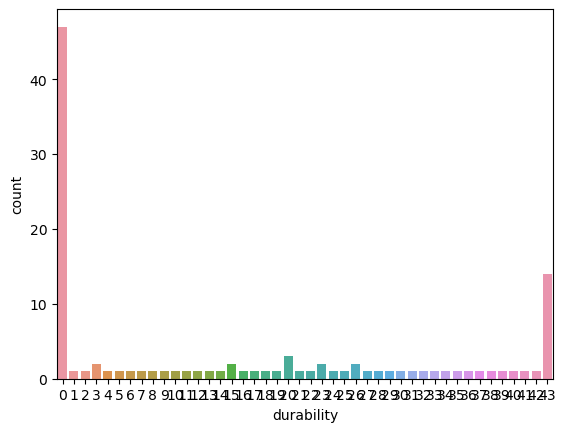

In [259]:
sns.countplot(x ='durability', data = shoe)
plt.show

# distplot

<function matplotlib.pyplot.show(close=None, block=None)>

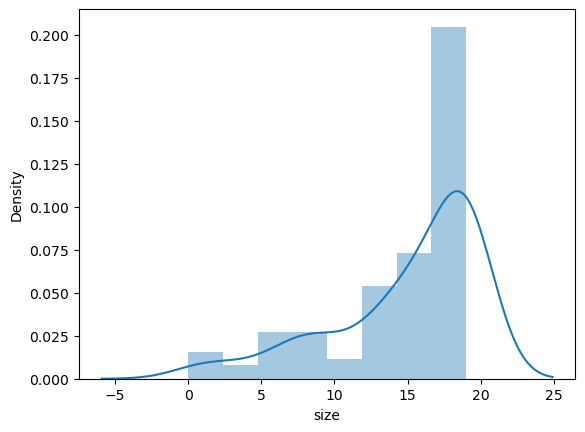

In [260]:
sns.distplot(shoe['size'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

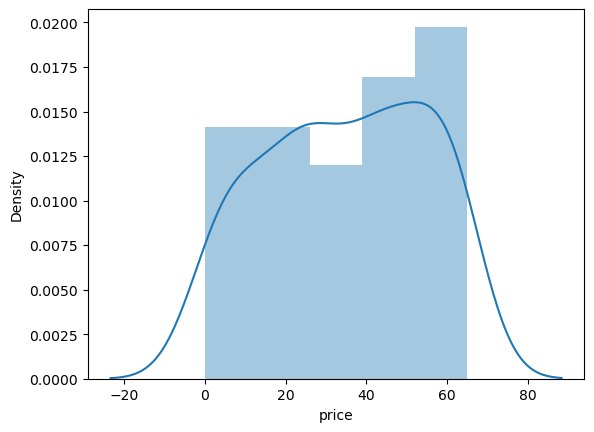

In [261]:
sns.distplot(shoe['price'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

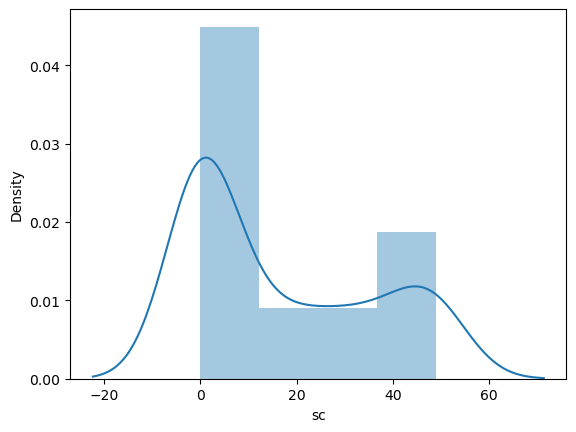

In [262]:
sns.distplot(shoe['sc'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

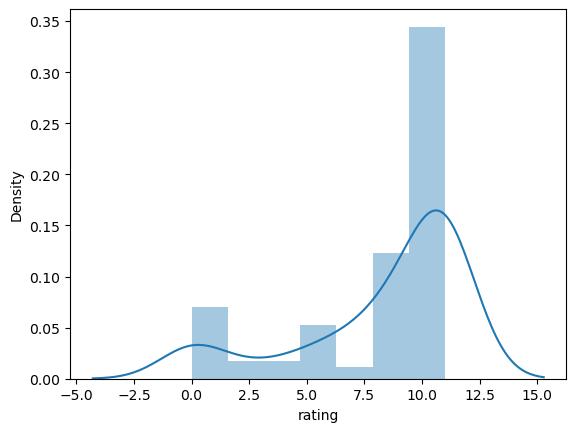

In [263]:
sns.distplot(shoe['rating'])
plt.show

# Bivariate Analysis:-

# Bar Graph

<Axes: xlabel='durability', ylabel='price'>

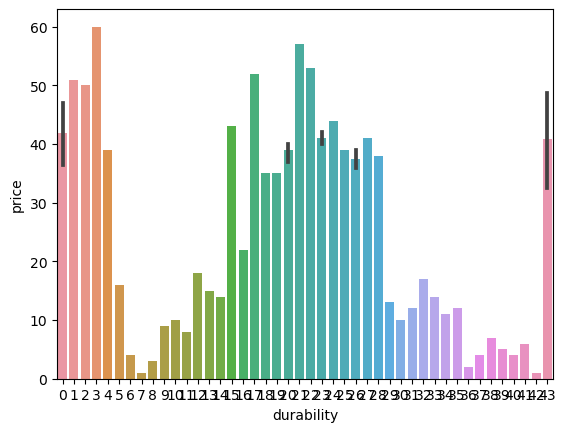

In [264]:
sns.barplot(x='durability',y='price',data=shoe)

<Axes: xlabel='size', ylabel='price'>

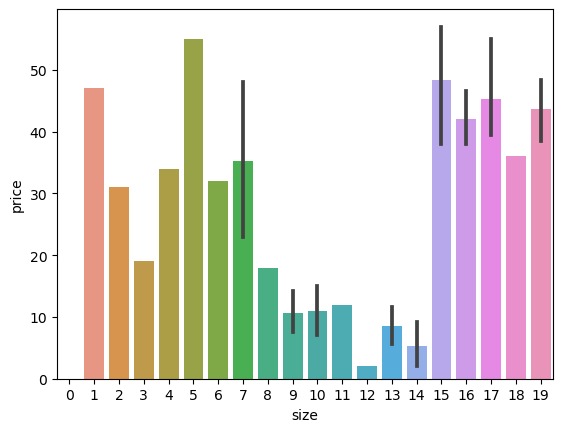

In [265]:
sns.barplot(x='size',y='price',data=shoe)

<Axes: xlabel='rating', ylabel='price'>

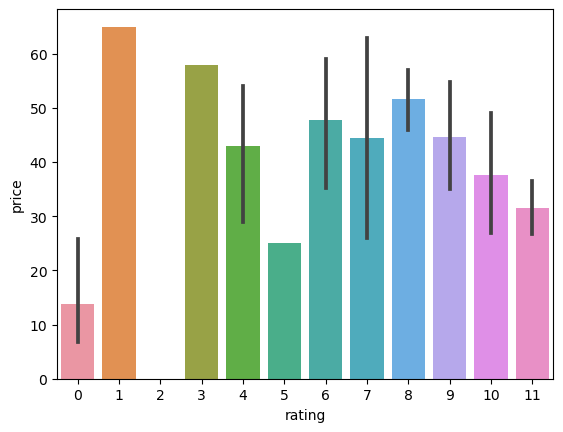

In [266]:
sns.barplot(x='rating',y='price',data=shoe)

<Axes: xlabel='review', ylabel='price'>

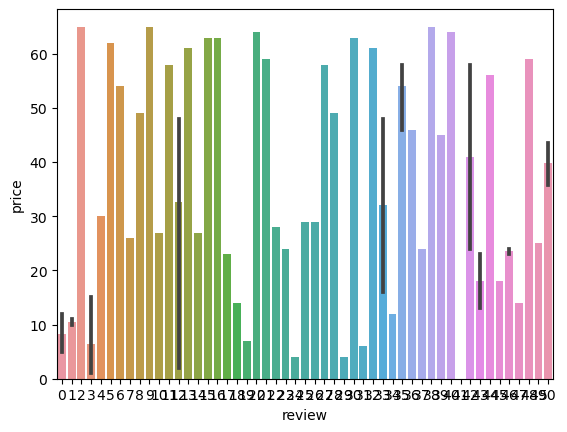

In [267]:
sns.barplot(x='review',y='price',data=shoe)

<Axes: xlabel='category', ylabel='price'>

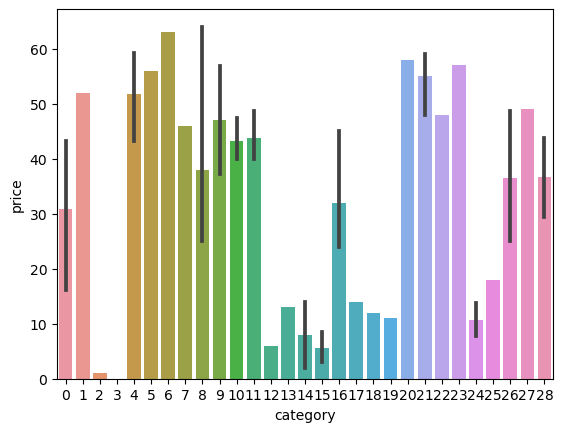

In [268]:
sns.barplot(x='category',y='price',data=shoe)

<Axes: xlabel='category', ylabel='rating'>

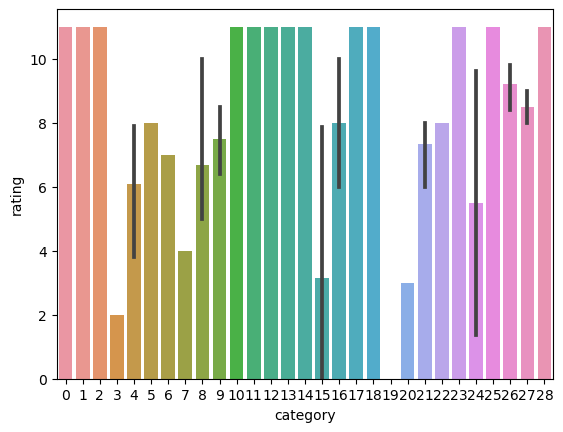

In [269]:
sns.barplot(x='category',y='rating',data=shoe)

<Axes: xlabel='review', ylabel='rating'>

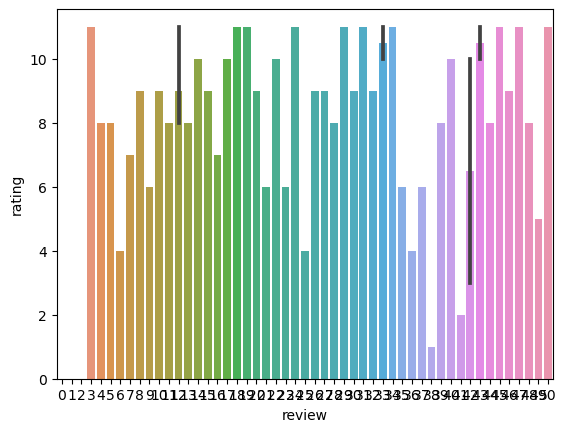

In [270]:
sns.barplot(x='review',y='rating',data=shoe)

<Axes: xlabel='size', ylabel='rating'>

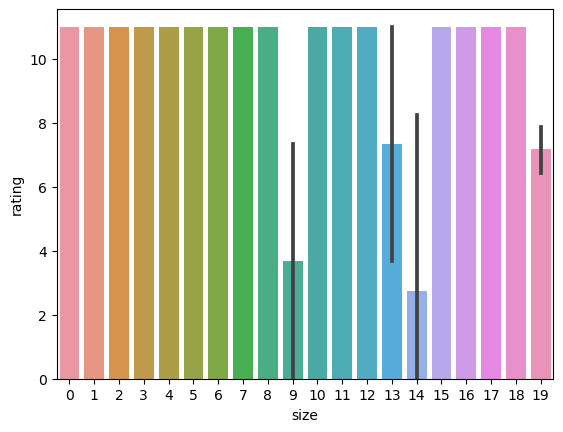

In [271]:
sns.barplot(x='size',y='rating',data=shoe)

<Axes: xlabel='durability', ylabel='rating'>

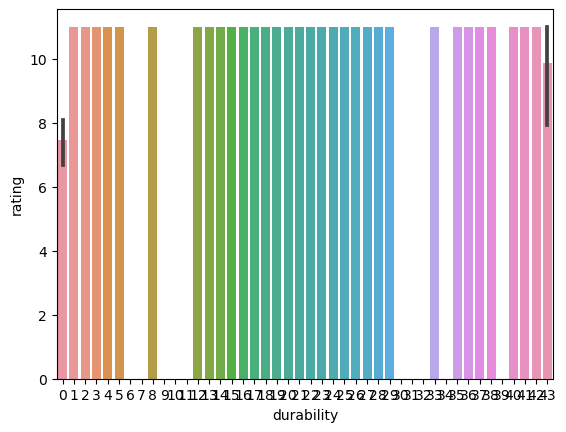

In [272]:
sns.barplot(x='durability',y='rating',data=shoe)

# Violin Plot

<Axes: xlabel='size', ylabel='price'>

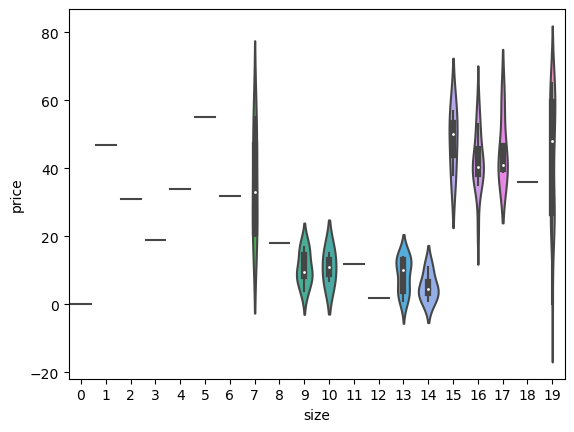

In [273]:
sns.violinplot(x='size',y='price',data=shoe)

<Axes: xlabel='category', ylabel='price'>

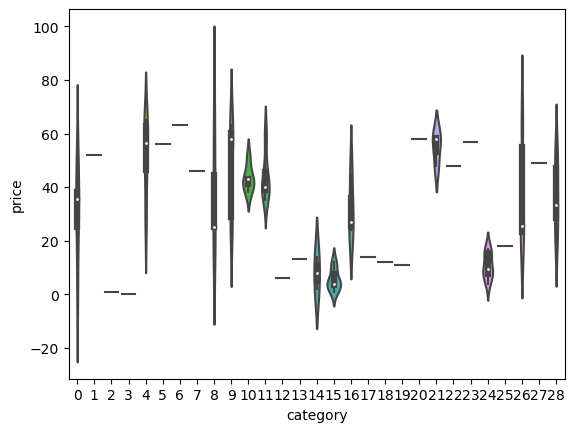

In [274]:
sns.violinplot(x='category',y='price',data=shoe)

<Axes: xlabel='rating', ylabel='price'>

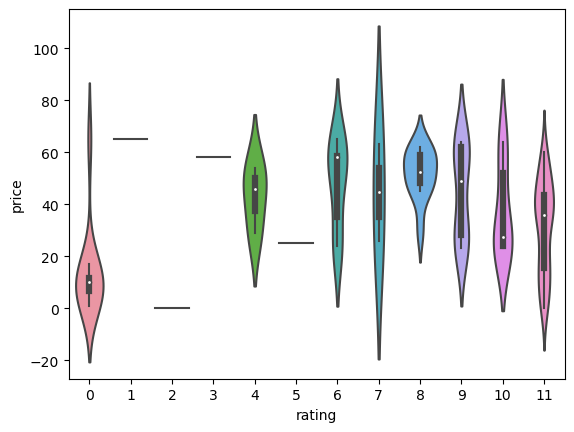

In [275]:
sns.violinplot(x='rating',y='price',data=shoe)

<Axes: xlabel='review', ylabel='price'>

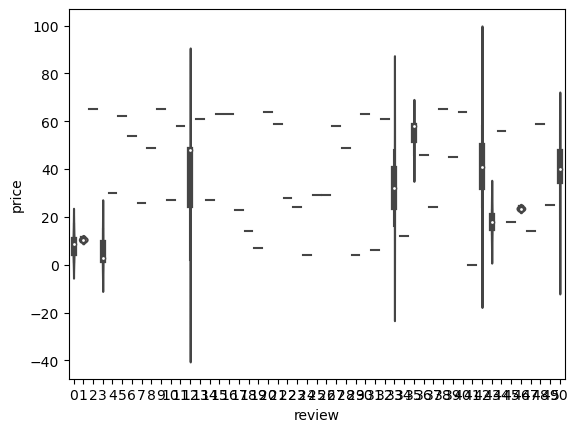

In [276]:
sns.violinplot(x='review',y='price',data=shoe)

<Axes: xlabel='size', ylabel='rating'>

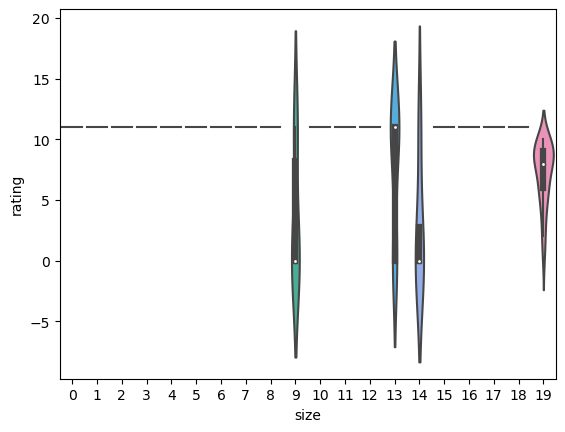

In [277]:
sns.violinplot(x='size',y='rating',data=shoe)

<Axes: xlabel='category', ylabel='rating'>

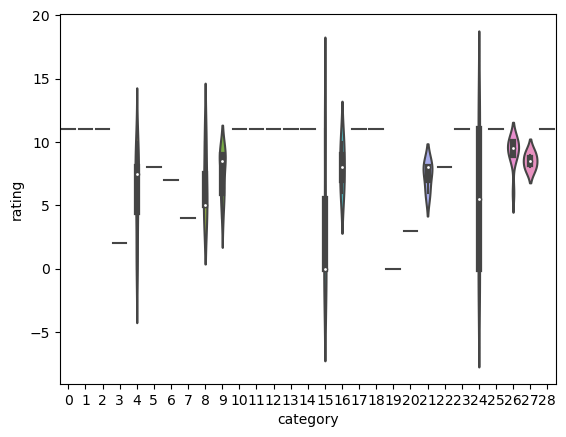

In [278]:
sns.violinplot(x='category',y='rating',data=shoe)

<Axes: xlabel='review', ylabel='rating'>

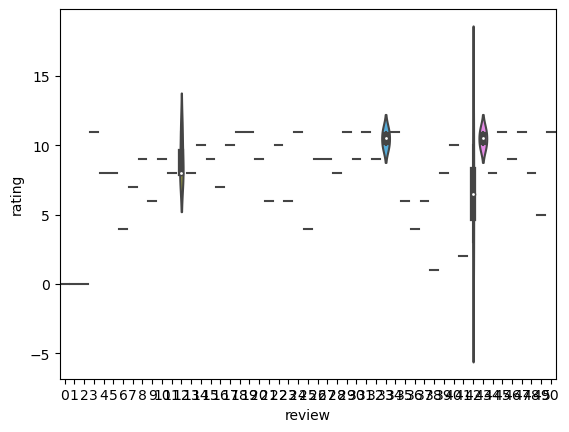

In [279]:
sns.violinplot(x='review',y='rating',data=shoe)

# Box Plot

name             Axes(0.125,0.747241;0.133621x0.132759)
price         Axes(0.285345,0.747241;0.133621x0.132759)
color          Axes(0.44569,0.747241;0.133621x0.132759)
category      Axes(0.606034,0.747241;0.133621x0.132759)
size          Axes(0.766379,0.747241;0.133621x0.132759)
sc               Axes(0.125,0.587931;0.133621x0.132759)
durability    Axes(0.285345,0.587931;0.133621x0.132759)
review         Axes(0.44569,0.587931;0.133621x0.132759)
rating        Axes(0.606034,0.587931;0.133621x0.132759)
dtype: object

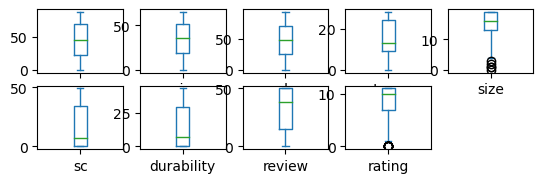

In [280]:
shoe.plot(kind='box',subplots=True,layout=(5,5))

The box plot reveals a significant number of outliers present in the data. As we proceed, these outliers will be eliminated.

# Histogram:-

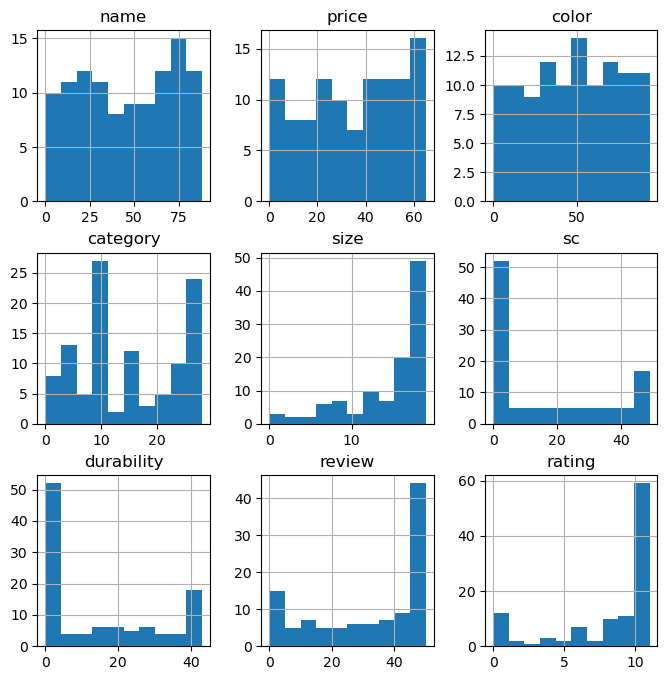

In [282]:
fig, ax = plt.subplots(figsize=(8, 8))
shoe.hist(ax=ax, bins=10)
plt.show()

# Scatter Plot

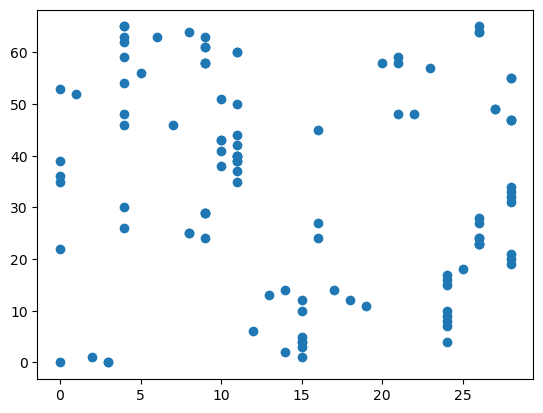

In [283]:
scatter_plot = plt.figure(figsize=(8, 6)).gca()
scatter_plot.scatter(shoe['category'], shoe['price'])
plt.show()

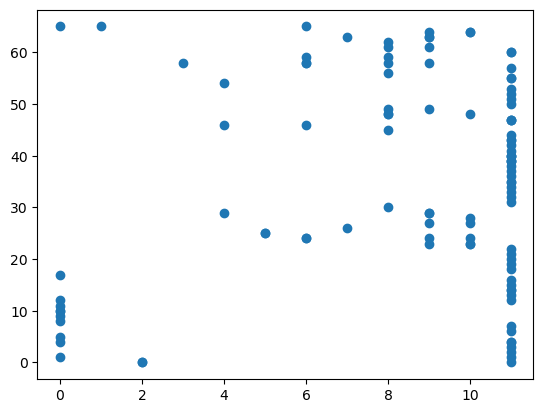

In [284]:
plt.scatter(shoe['rating'],shoe['price'])
plt.show()

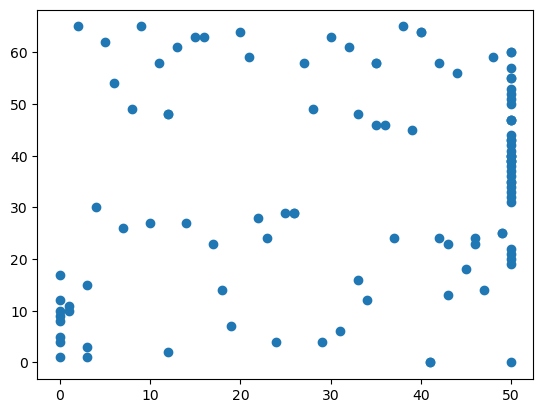

In [285]:
plt.scatter(shoe['review'],shoe['price'])
plt.show()

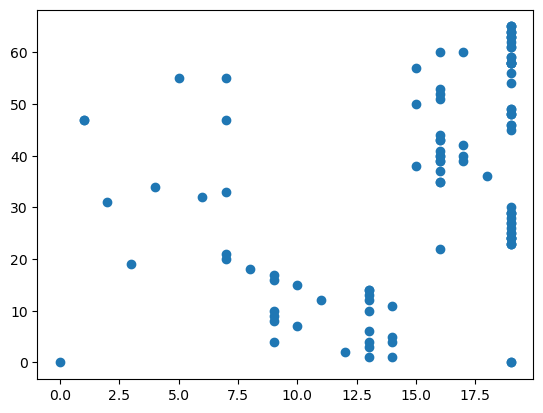

In [286]:
plt.scatter(shoe['size'],shoe['price'])
plt.show()

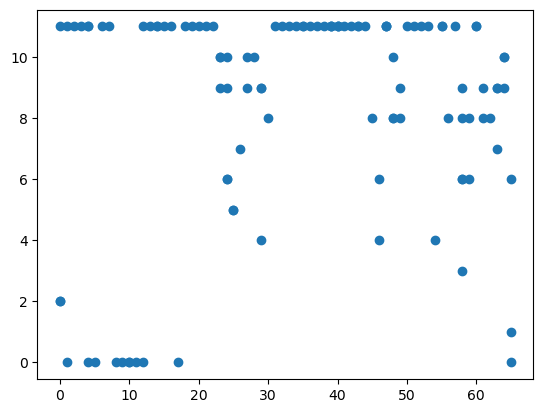

In [287]:
plt.scatter(shoe['price'],shoe['rating'])
plt.show()

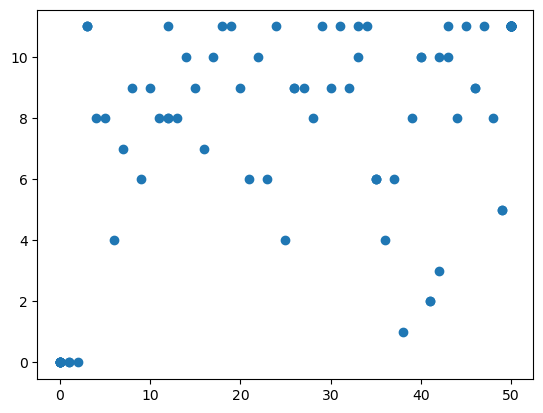

In [288]:
plt.scatter(shoe['review'],shoe['rating'])
plt.show()

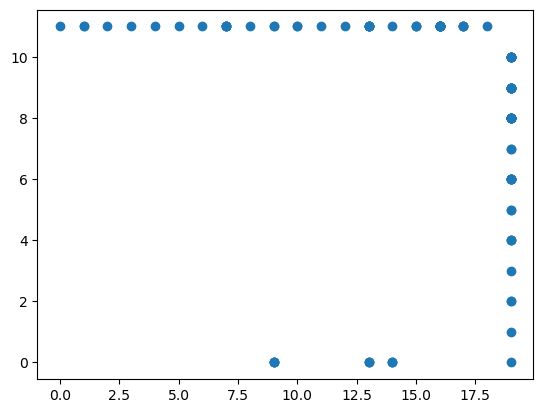

In [289]:
plt.scatter(shoe['size'],shoe['rating'])
plt.show()

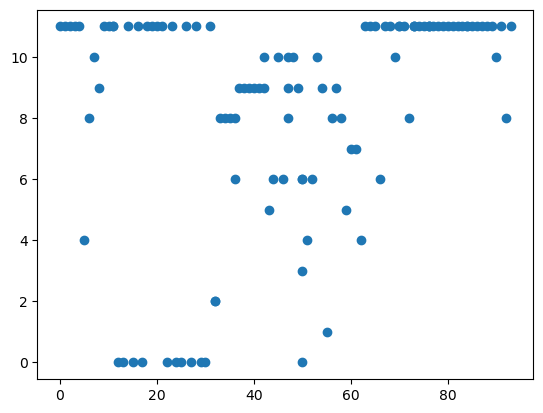

In [290]:
plt.scatter(shoe['color'],shoe['rating'])
plt.show()

# Pair Plot:-

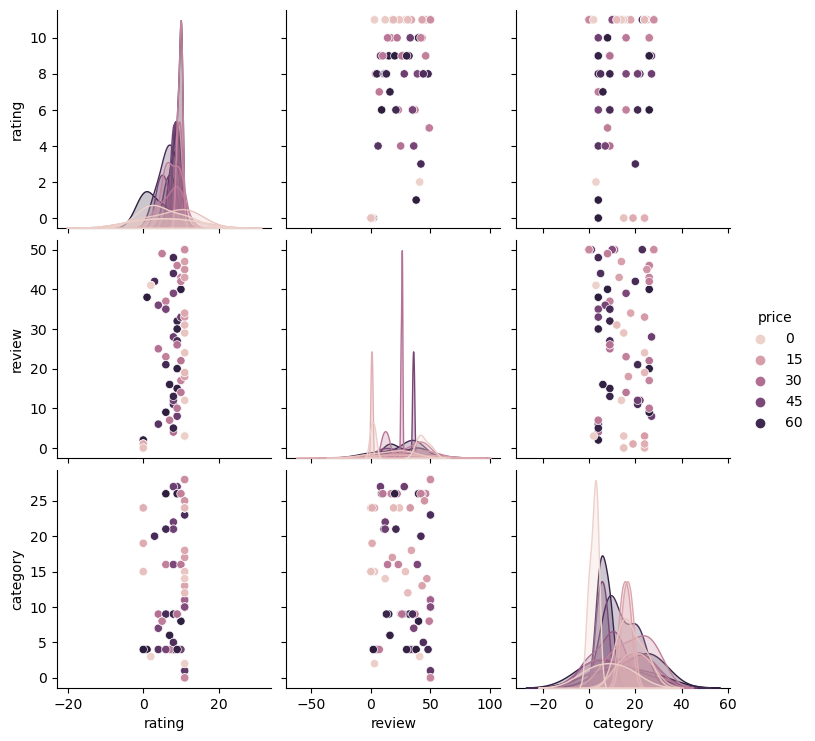

In [291]:
sns.pairplot(data=shoe,hue='price',vars=['rating','review','category'])

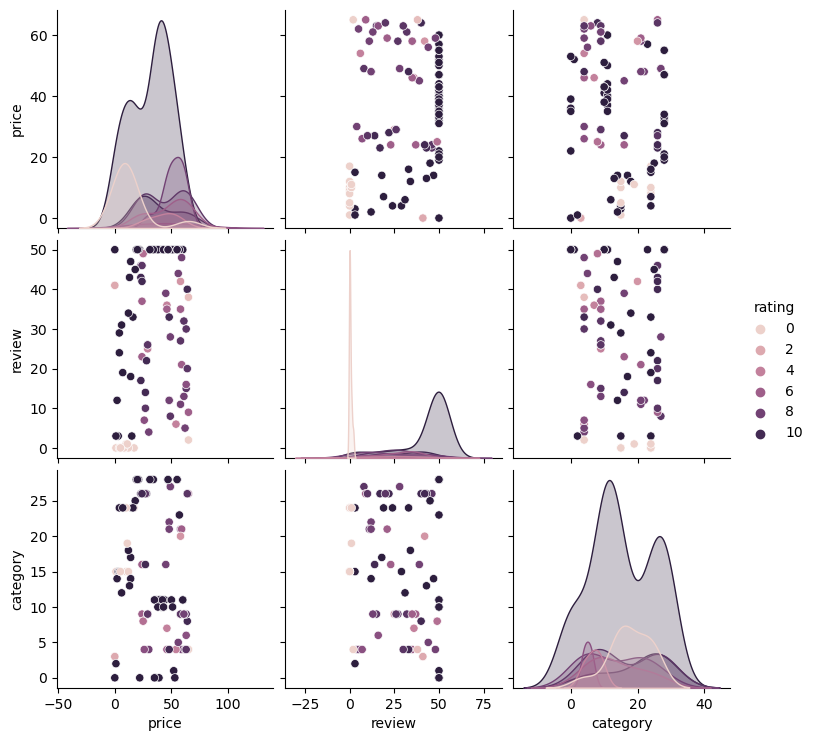

In [292]:
sns.pairplot(data=shoe,hue='rating',vars=['price','review','category'])

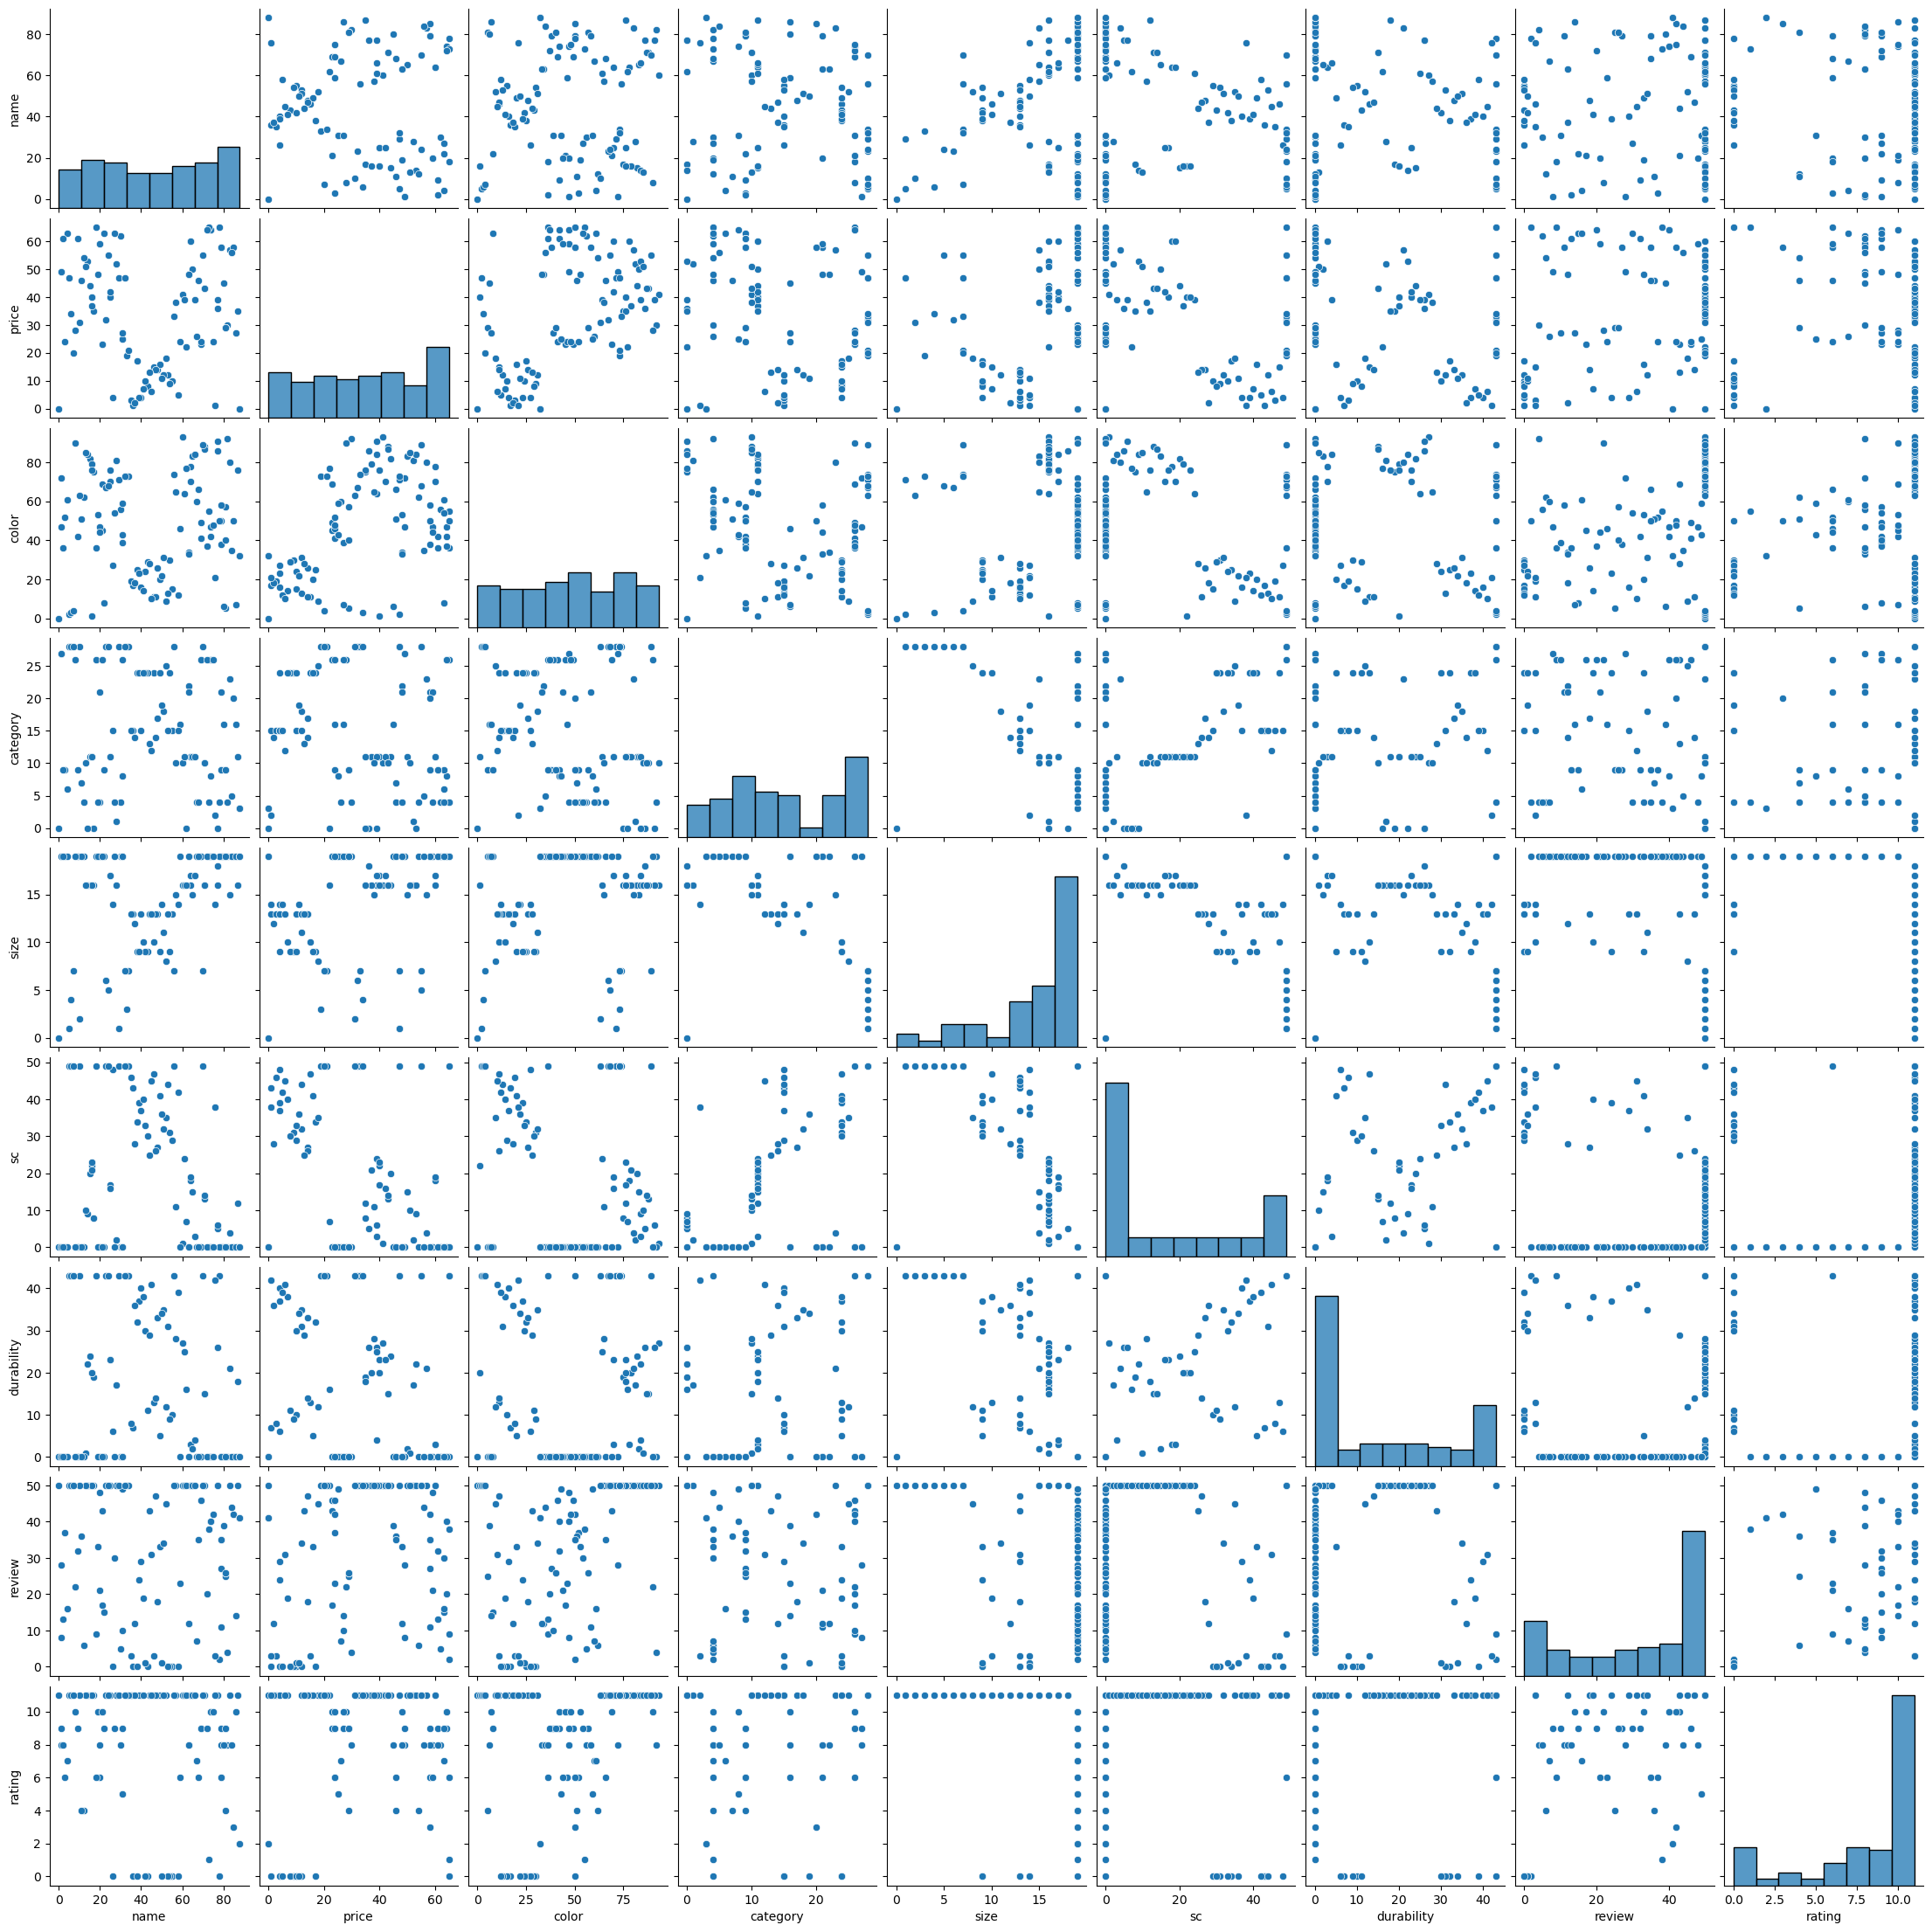

In [293]:
sns.pairplot(shoe)

# Joint Plot:-

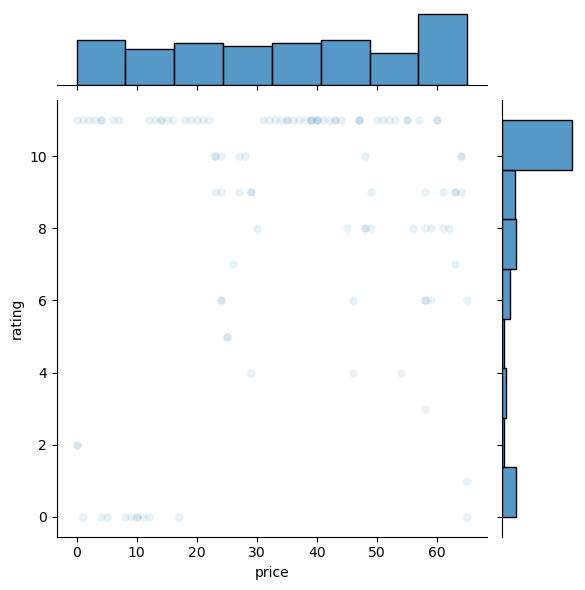

In [294]:
from scipy.stats import pearsonr
sns.jointplot(x='price', y='rating', data=shoe, alpha=0.1)

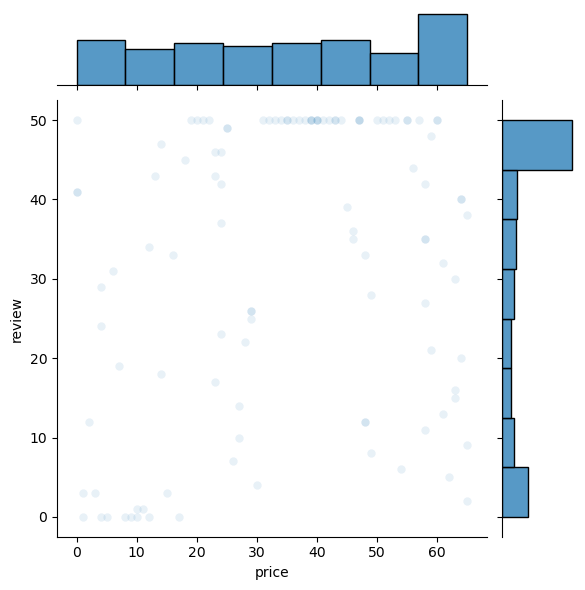

In [295]:
sns.jointplot(x='price', y='review', data=shoe, alpha=0.1)

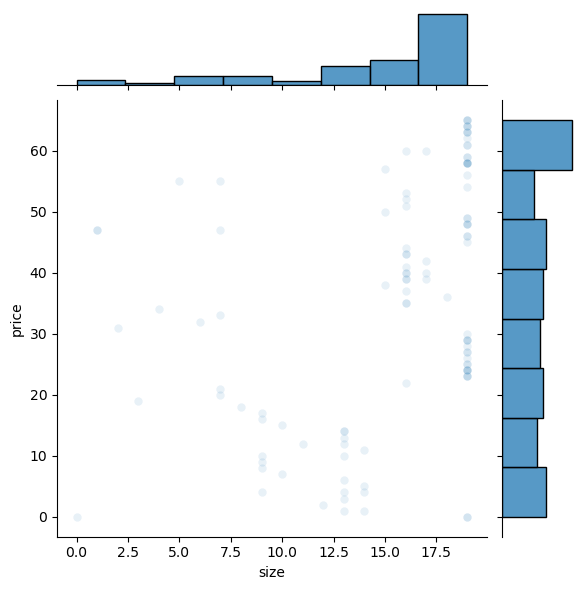

In [296]:
sns.jointplot(x='size', y='price', data=shoe, alpha=0.1)

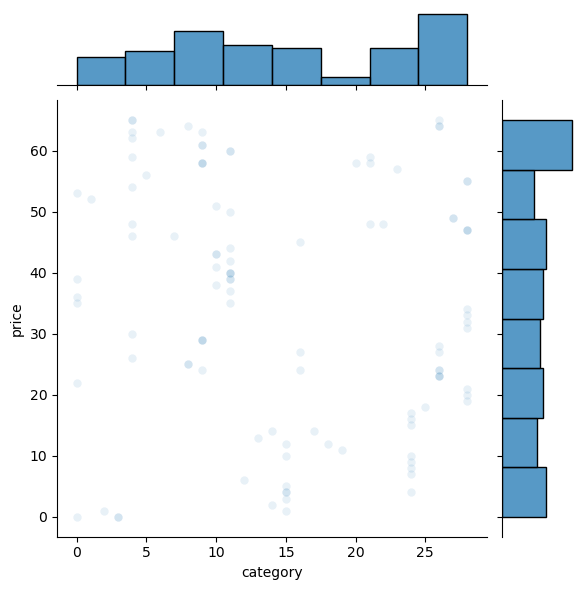

In [297]:
sns.jointplot(x='category', y='price', data=shoe, alpha=0.1)

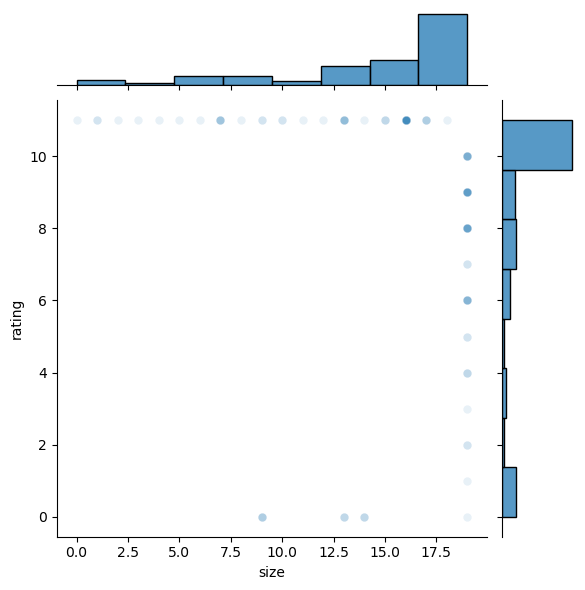

In [298]:
sns.jointplot(x='size', y='rating', data=shoe, alpha=0.1)

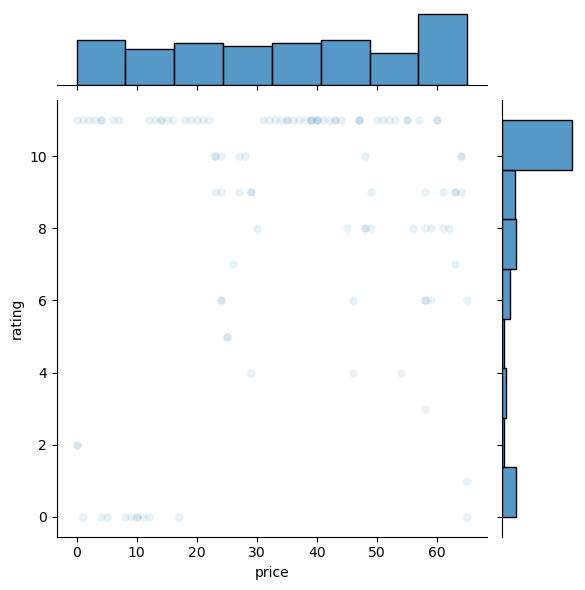

In [299]:
sns.jointplot(x='price', y='rating', data=shoe, alpha=0.1)

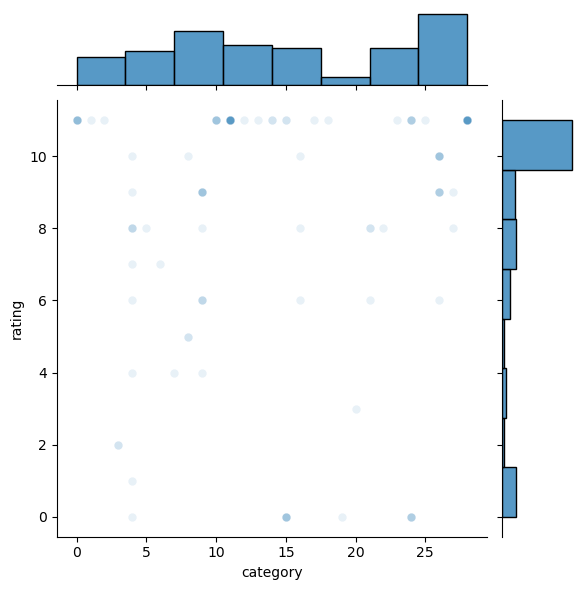

In [300]:
sns.jointplot(x='category', y='rating', data=shoe, alpha=0.1)

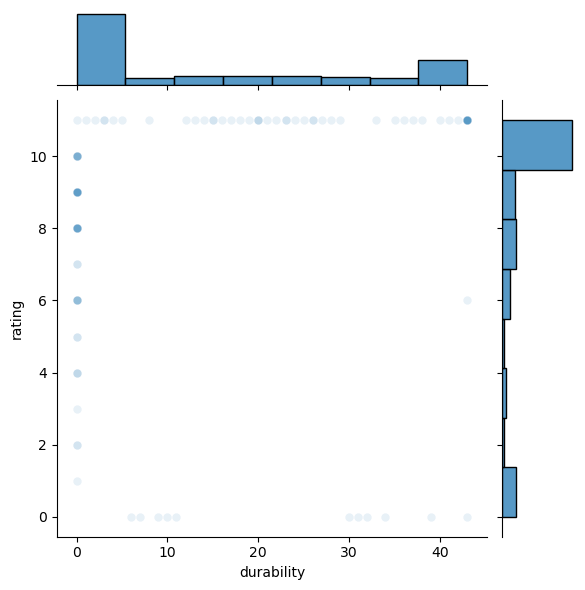

In [301]:
sns.jointplot(x='durability', y='rating', data=shoe, alpha=0.1)

# Skewness:-

In [302]:
shoe.skew()

name         -0.061798
price        -0.141829
color        -0.073094
category      0.089250
size         -1.271949
sc            0.631290
durability    0.614870
review       -0.542257
rating       -1.307856
dtype: float64

# Utilizing the Z-score for the elimination of outliers and reduction of skewness.

In [303]:
from scipy.stats import zscore
z=np.abs(zscore(shoe))
z

,name,price,color,category,size,sc,durability,review,rating
0,1.729848,1.752633,1.804679,1.647719,2.989407,0.878415,0.893374,0.976572,0.740229
1,1.124297,0.263589,1.766762,0.426696,0.201245,0.283438,0.314787,0.976572,0.740229
2,0.540968,0.313994,1.721541,0.537698,0.201245,0.825604,0.737643,0.976572,0.740229
3,1.184366,0.061966,1.456127,1.647719,0.600077,0.614358,0.677235,0.976572,0.740229
4,1.184366,0.213183,1.645708,1.647719,0.201245,0.561546,0.677235,0.976572,0.740229
...,...,...,...,...,...,...,...,...,...
104,0.480899,0.794928,0.963214,1.460340,2.391160,1.709349,1.704171,0.976572,0.740229
105,0.443052,0.694117,0.963214,1.460340,1.593497,1.709349,1.704171,0.976572,0.740229
106,0.518746,0.616427,0.963214,1.460340,1.593497,1.709349,1.704171,0.976572,0.740229
107,1.351378,0.190061,0.584051,1.460340,2.590575,1.709349,1.704171,0.976572,0.740229


In [304]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [305]:
shoe_new=shoe[(z<3).all(axis=1)]

In [306]:
shoe=shoe_new
shoe.shape

(109, 9)

# Training The Model

In [307]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=52)

In [308]:
x_train.shape

(76, 8)

In [309]:
x_test.shape

(33, 8)

In [310]:
y_train.shape

(76,)

In [311]:
y_test.shape

(33,)

In [312]:
lm=LinearRegression()

In [313]:
lm.fit(x_train,y_train)

LinearRegression()

In [314]:
lm.coef_

array([-0.08045675,  0.27773981,  0.35450841,  1.4994546 , -0.04782191,
       -0.03025276,  0.19954248,  0.16696374])

In [315]:
lm.intercept_

-10.912653414760548

In [316]:
lm.score(x_train,y_train)

0.3977488454920697

## Predicting the value

In [317]:
pred=lm.predict(x_test)
print("Predicted result price:",pred)
print("actual price:",y_test)

Predicted result price: [45.76506533 48.57518014 10.20229304 43.31164661 50.49090337 36.77121275
 25.71524049 41.78201341 33.4807669  27.59688396 40.82525159 44.35485815
 39.30958303 13.45490504 13.53146232 25.70459814 46.26126289 40.44108838
 36.86946092 31.85590975 12.0910486  42.89799495  8.83581545 17.98205638
 22.50103625 47.87941315 10.87534586 34.46816676 40.59699412 42.66476173
 44.1418786  16.62127081 32.84851869]
actual price: 24     43
2      41
80     12
27     24
18     51
66     64
36     63
21     35
44     48
52     45
51     59
8      60
72     63
73      1
101    34
67     65
19     57
57     48
37     24
53     58
88     10
4      39
98     47
89      4
85     12
14     40
95      5
40     62
58     58
29     23
70     24
96      6
48     48
Name: price, dtype: int32


In [318]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 15.609765697123539
Mean squared error: 347.9672088490952
Root mean squared error: 18.653879190374724


In [319]:
#change coming in y whenever x is being changed
print(r2_score(y_test,pred))

0.15293105971462007


In [320]:
knn=KNeighborsRegressor()

In [321]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [322]:
predknn=knn.predict(x_test)

In [323]:
knn.score(x_train,y_train)

0.4659373644208056

In [324]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predknn))
print('Mean squared error:',mean_squared_error(y_test,predknn))
print('r2 score',(r2_score(y_test,predknn)))

error:
Mean absolute error: 11.72121212121212
Mean squared error: 243.6412121212121
r2 score 0.40689554040460485


In [325]:
svm=SVR()

In [326]:
svm.fit(x_train,y_train)

SVR()

In [327]:
predsvm=svm.predict(x_test)

In [328]:
svm.score(x_train,y_train)

0.22729752348724297

In [329]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predsvm))
print('Mean squared error:',mean_squared_error(y_test,predsvm))
print('r2 score',(r2_score(y_test,predsvm)))

error:
Mean absolute error: 17.100033317801056
Mean squared error: 397.18251976052926
r2 score 0.033124479670914475


In [330]:
dtc=DecisionTreeRegressor()

In [331]:
dtc.fit(x_train,y_train)

DecisionTreeRegressor()

In [332]:
preddtc=dtc.predict(x_test)

In [333]:
dtc.score(x_train,y_train)

1.0

In [334]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtc))
print('Mean squared error:',mean_squared_error(y_test,preddtc))
print('r2 score',(r2_score(y_test,preddtc)))

error:
Mean absolute error: 10.030303030303031
Mean squared error: 241.66666666666666
r2 score 0.41170224656309373


In [335]:
rfc=RandomForestRegressor()

In [336]:
rfc.fit(x_train,y_train)

RandomForestRegressor()

In [337]:
predrfc=rfc.predict(x_test)

In [338]:
rfc.score(x_train,y_train)

0.9243223280253242

In [339]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrfc))
print('Mean squared error:',mean_squared_error(y_test,predrfc))
print('r2 score',(r2_score(y_test,predrfc)))

error:
Mean absolute error: 12.839393939393942
Mean squared error: 261.40463030303033
r2 score 0.36365342036436776


In [340]:

# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [341]:
#testing the model
predl=lasso.predict(x_test)

In [342]:
lasso.score(x_train,y_train)

0.39774250228933694

In [343]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predl))
print('Mean squared error:',mean_squared_error(y_test,predl))
print('r2 score',(r2_score(y_test,predl)))

error:
Mean absolute error: 15.612753732165523
Mean squared error: 347.7344513775906
r2 score 0.15349766949771726


In [344]:
# Fit Ridge regression model
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

In [345]:
#testing the model
predr=ridge.predict(x_test)

In [346]:
ridge.score(x_train,y_train)

0.39774884424142243

In [347]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predr))
print('Mean squared error:',mean_squared_error(y_test,predr))
print('r2 score',(r2_score(y_test,predr)))

error:
Mean absolute error: 15.60971329354469
Mean squared error: 347.9626744436451
r2 score 0.15294209797892133


# K Fold Validation:-

For comparing the score of different models:-

In [348]:
from sklearn.model_selection import KFold, cross_val_score
k_folds=KFold(n_splits=5)
score=cross_val_score(lm,x_train,y_train,cv=k_folds)

In [349]:
print('The Best score for Linear Model is',score.mean())

The Best score for Linear Model is 0.070784198421982


In [350]:
k_folds=KFold(n_splits=5)
score=cross_val_score(dtc,x_train,y_train,cv=k_folds)
print('The Best score for Decision Tree Regressor is',score.mean())

The Best score for Decision Tree Regressor is 0.08236243520527456


In [351]:
k_folds=KFold(n_splits=5)
score=cross_val_score(rfc,x_train,y_train,cv=k_folds)
print('The Best score for Random Forest Regressor is',score.mean())

The Best score for Random Forest Regressor is 0.3359559217333318


In [352]:
k_folds=KFold(n_splits=5)
score=cross_val_score(svm,x_train,y_train,cv=k_folds)
print('The Best score for SVR is',score.mean())

The Best score for SVR is 0.09368014310024853


In [353]:
k_folds=KFold(n_splits=5)
score=cross_val_score(knn,x_train,y_train,cv=k_folds)
print('The Best score for K Neighbour Regressor is',score.mean())

The Best score for K Neighbour Regressor is 0.1338535359704399


In [354]:
k_folds=KFold(n_splits=5)
score=cross_val_score(lasso,x_train,y_train,cv=k_folds)
print('The Best score for Lasso is',score.mean())

The Best score for Lasso is 0.07266006435355281


In [355]:
k_folds=KFold(n_splits=5)
score=cross_val_score(ridge,x_train,y_train,cv=k_folds)
print('The Best score for Ridge is',score.mean())

The Best score for Ridge is 0.07082861865054042


# Hypertuning the Best Model
 

# Randomized Search

In [356]:
#estimating the parameters
param_grid={'n_estimators':[20,30],'max_features':['auto','sqrt'],'min_samples_split':[3,6],'min_samples_leaf':[7,9],'bootstrap':[True,False]}
from sklearn.model_selection import RandomizedSearchCV
rfc_random=RandomizedSearchCV(estimator=rfc,param_distributions=param_grid,n_iter=50,verbose=1,cv=5,random_state=42,n_jobs=2)

In [357]:
rfc_cv=RandomizedSearchCV(RandomForestRegressor(),param_grid,cv=5)
rfc_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [7, 9],
                                        'min_samples_split': [3, 6],
                                        'n_estimators': [20, 30]})

In [358]:
print('Best Parameters',rfc_cv.best_params_)
print('Best Score',rfc_cv.best_score_)

Best Parameters {'n_estimators': 30, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': 'auto', 'bootstrap': True}
Best Score 0.42290424394620096


In [359]:


r_fit=RandomForestRegressor(n_estimators= 20, min_samples_split= 3, min_samples_leaf= 7, max_features='auto', bootstrap=True)


In [360]:
r_fit.fit(x_train,y_train)

RandomForestRegressor(max_features='auto', min_samples_leaf=7,
                      min_samples_split=3, n_estimators=20)

Formulate a dataframe that comprises both the actual and forecasted data.

In [362]:
df=pd.DataFrame({'Actual Data':y_test,'predicted Data':r_fit.predict(x_test)})

In [363]:
df

,Actual Data,predicted Data
24,43,42.150133
2,41,36.664618
80,12,12.697576
27,24,43.337584
18,51,41.877524
66,64,47.023900
36,63,14.903366
21,35,42.650966
44,48,33.411742
52,45,18.347270


# Data Preprocessing for rating:-

In [364]:
x=shoe.drop(columns=['rating'],axis=1)
print(x)

     name  price  color  category  size  sc  durability  review
0       0      0      0         0     0   0           0      50
1      16     40      1        11    16  22          20      50
2      60     41     93        10    16   1          27      50
3      77     36     86         0    18   5          26      50
4      77     39     91         0    16   6          26      50
..    ...    ...    ...       ...   ...  ..         ...     ...
104    33     19     73        28     3  49          43      50
105    34     21     73        28     7  49          43      50
106    32     47     73        28     7  49          43      50
107    10     31     63        28     2  49          43      50
108     7     20      4        28     7  49          43      50

[109 rows x 8 columns]


In [365]:
y=shoe['rating']
print(y)

0      11
1      11
2      11
3      11
4      11
       ..
104    11
105    11
106    11
107    11
108    11
Name: rating, Length: 109, dtype: int32


# Training The Model:-

In [366]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=35)

In [367]:
x_train.shape

(76, 8)

In [368]:
y_train.shape

(76,)

In [369]:
x_test.shape

(33, 8)

In [370]:
y_test.shape

(33,)

In [371]:
lm=LinearRegression()

In [372]:
lm.fit(x_train,y_train)

LinearRegression()

In [373]:
lm.coef_

array([-0.01944492,  0.00344298,  0.00351657,  0.05704962,  0.00931712,
       -0.05378506,  0.08046448,  0.09068654])

In [374]:
lm.intercept_

4.759179192933285

In [375]:
lm.score(x_train,y_train)

0.34396851727973365

In [376]:
#predict the value
pred=lm.predict(x_test)
print("Predicted result price:",pred)
print("actual price:",y_test)

Predicted result price: [ 7.03193204 11.42379538  6.27876453 11.7274316   8.99366127  9.96409286
  4.35552566  4.20760182 11.86786149  9.47618667  8.53433354  6.69536111
 10.64400968  7.08312535  6.25920512  6.2440788   3.24961845 11.76361027
  9.29350634  9.52700137  3.9986317   7.89191049  9.54045279 10.59480802
  8.00763004  6.47297154  6.57463283  7.68866667  9.59775442 11.07374812
 10.93463541  4.35947909  8.57978434]
actual price: 37      6
104    11
48      8
108    11
25     10
10     11
77      0
78     11
107    11
27      9
38      9
53      9
13     11
50      7
35      4
88      0
84      0
101    11
0      11
46      5
75      0
81     11
24     11
5      11
51      6
71      9
82     11
67      0
22     11
7      11
14     11
31      8
8      11
Name: rating, dtype: int32


In [377]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 2.2309178388479376
Mean squared error: 8.950278213605912
Root mean squared error: 2.9917015582450586


In [378]:
knn=KNeighborsRegressor()

In [379]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [380]:
predknn=knn.predict(x_test)

In [381]:
knn.score(x_train,y_train)

0.6246956127423194

In [382]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predknn))
print('Mean squared error:',mean_squared_error(y_test,predknn))
print('r2 score',(r2_score(y_test,predknn)))

error:
Mean absolute error: 1.4969696969696968
Mean squared error: 6.107878787878789
r2 score 0.6015646340002395


In [383]:
svm=SVR()

In [384]:
svm.fit(x_train,y_train)

SVR()

In [385]:
predsvm=svm.predict(x_test)

In [386]:
svm.score(x_train,y_train)

0.1171008340282077

In [387]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predsvm))
print('Mean squared error:',mean_squared_error(y_test,predsvm))
print('r2 score',(r2_score(y_test,predsvm)))

error:
Mean absolute error: 2.196101017026855
Mean squared error: 14.550089899936898
r2 score 0.050853725827765595


In [388]:
dtc=DecisionTreeRegressor()

In [389]:
dtc.fit(x_train,y_train)

DecisionTreeRegressor()

In [390]:
preddtc=dtc.predict(x_test)

In [391]:
dtc.score(x_train,y_train)

1.0

In [392]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtc))
print('Mean squared error:',mean_squared_error(y_test,preddtc))
print('r2 score',(r2_score(y_test,preddtc)))

error:
Mean absolute error: 0.6060606060606061
Mean squared error: 2.242424242424242
r2 score 0.8537198993650413


In [393]:
rfc=RandomForestRegressor()

In [394]:
rfc.fit(x_train,y_train)

RandomForestRegressor()

In [395]:
predrfc=rfc.predict(x_test)

In [396]:
rfc.score(x_train,y_train)

0.9658220779956921

In [397]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrfc))
print('Mean squared error:',mean_squared_error(y_test,predrfc))
print('r2 score',(r2_score(y_test,predrfc)))

error:
Mean absolute error: 0.7006060606060606
Mean squared error: 1.6887151515151515
r2 score 0.8898400143764227


In [398]:
lasso=Lasso()

In [399]:
lasso.fit(x_train,y_train)

Lasso()

In [400]:
predl=lasso.predict(x_test)

In [401]:
lasso.score(x_train,y_train)

0.3372043002847521

In [402]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predl))
print('Mean squared error:',mean_squared_error(y_test,predl))
print('r2 score',(r2_score(y_test,predl)))

error:
Mean absolute error: 2.153355578435739
Mean squared error: 8.381013760075156
r2 score 0.453281179781847


# K Fold Validation:-

In [403]:
#for comparing the score of different models
from sklearn.model_selection import KFold, cross_val_score
k_folds=KFold(n_splits=5)
score=cross_val_score(lm,x_train,y_train,cv=k_folds)
print('The Best Score for Linear Model is',score.mean())

The Best Score for Linear Model is 0.046929390888631684


In [404]:

score=cross_val_score(svm,x_train,y_train,cv=k_folds)
print('The Best Score for SVR is',score.mean())

The Best Score for SVR is -0.0015757831436509218


In [405]:

score=cross_val_score(dtc,x_train,y_train,cv=k_folds)
print('The Best Score for Decision Tree Regressor is',score.mean())

The Best Score for Decision Tree Regressor is 0.4912127733417286


In [406]:

score=cross_val_score(rfc,x_train,y_train,cv=k_folds)
print('The Best Score for Random Forest Regressor is',score.mean())

The Best Score for Random Forest Regressor is 0.7168488699038709


In [407]:

score=cross_val_score(knn,x_train,y_train,cv=k_folds)
print('The Best Score for K Neighbour regressor is',score.mean())

The Best Score for K Neighbour regressor is 0.2625850810294441


In [408]:

score=cross_val_score(lasso,x_train,y_train,cv=k_folds)
print('The Best Score for Lasso is',score.mean())

The Best Score for Lasso is 0.11487698941330807


# Hyperparameter tuning the Best Model

# Randomize Search

In [409]:
#estimating the parameters
param_grid={'n_estimators':[90,30],'max_features':['auto','sqrt'],'min_samples_split':[4,6],'min_samples_leaf':[6,9],'bootstrap':[True,False]}

In [410]:
from sklearn.model_selection import RandomizedSearchCV
rfc_random=RandomizedSearchCV(estimator=rfc,param_distributions=param_grid,n_iter=80,verbose=-1,cv=5,random_state=30,n_jobs=9)

In [411]:
rfc_cv=RandomizedSearchCV(RandomForestRegressor(),param_grid,cv=5)
rfc_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [6, 9],
                                        'min_samples_split': [4, 6],
                                        'n_estimators': [90, 30]})

In [412]:
print('Best Parameters',rfc_cv.best_params_)
print('Best Score',rfc_cv.best_score_)

Best Parameters {'n_estimators': 90, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'auto', 'bootstrap': True}
Best Score 0.3902261422503074


In [413]:
r_fit=RandomForestRegressor(n_estimators= 90, min_samples_split= 4, min_samples_leaf= 6, max_features='sqrt', bootstrap=False)

In [414]:
r_fit.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=6,
                      min_samples_split=4, n_estimators=90)

In [415]:
df=pd.DataFrame({'Actual Data':y_test,'predicted Data':r_fit.predict(x_test)})

In [416]:
df

,Actual Data,predicted Data
37,6,8.125650
104,11,10.903894
48,8,8.302521
108,11,10.596460
25,10,7.943676
10,11,10.520273
77,0,2.097055
78,11,8.839141
107,11,10.522816
27,9,8.363182


In [417]:
#Random Forest Regressor is the best model to predict the data